In [2]:
%matplotlib inline
import numpy as np
import theano
import theano.tensor as T
from Utilities.Sound import *
from Functionals import *
from Batcher import *

In [3]:
mozart = get_sound('Mozart')[98160: 10129900]

In [ ]:
playseq(mozart, time=(0,6))

In [4]:
length = 1024
maximum = (mozart.shape[0]/length)*length
mozart_amp, mozart_phase = FourierEncoder(mozart[0:maximum], length)
reconstruction = FourierDecoder(mozart_amp, mozart_phase, length)

In [ ]:
playseq(reconstruction, time=(0,6))

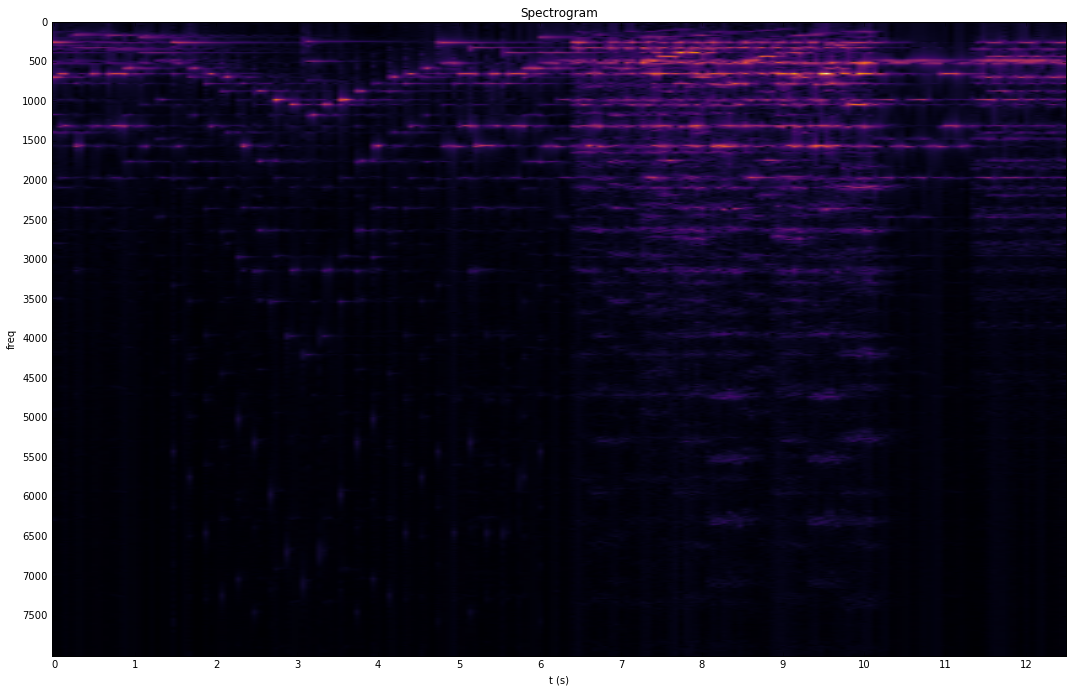

In [5]:
spectro(mozart_amp, time=(113,125))

In [208]:
file = open("medium.pkl", "rb")
theano.config.reoptimize_unpickled_function = True
map = pickle.load(file)
lstm=map["model"]

In [209]:
x = T.tensor3("x")
y = T.tensor3("y")

expres = lstm.unfold_train_apply(x, 3)

cost = T.sum((expres[0]-y)**2)

cost_func = theano.function([x,y], cost)

In [220]:
batcher = Batcher([250,3])

In [221]:
batch = batcher.get_batch(500)

In [224]:
min = 100000000
for i in range(1):
    batch = batcher.get_batch(64)
    a = cost_func(batch[0], batch[1])
    if a < min: min = a
print min

265.060521038


In [21]:
batch = batcher.get_batch(64)
batch[0].max()

0.37138337500637864

In [ ]:
mozart = np.asarray(mozart, dtype=np.int)
min = mozart.min()
max = mozart.max()
print min, max

In [ ]:
(2*(np.asarray(mozart, dtype=np.int) - min)/float(max - min)-1)

In [ ]:
(np.asarray(mozart, dtype=np.int) - min).min()

In [ ]:
float(max - min)

In [ ]:
max

In [ ]:
type(mozart)

In [ ]:
((mozart - mozart.mean())/mozart.var()).max()

In [64]:
curve = map["curve"]

In [65]:
curve

array([], dtype=float64)

In [75]:
map["curve"].tolist() + [2,3,4]

[2, 3, 4]

In [266]:
#map["curve"]

In [242]:
x = T.matrix("x")
m = T.tensor3("m")
a = lstm.train_apply([x, m])

In [245]:
f = theano.function([x, m], a[0])
f2 = theano.function([x, m], a[1])

In [254]:
h = np.random.normal(size=(2,1,250))/100
k = np.random.normal(size=(1,250))/100

In [268]:
ans = []
for i in range(2000):
    k = f(k, h)
    h = f2(k, h)
    ans += [k[0]]

In [269]:
s = np.concatenate(ans, axis=0)

In [270]:
length = 1024
maximum = (s.shape[0]/length)*length
s_amp, s_phase = FourierEncoder(s[0:maximum], length)

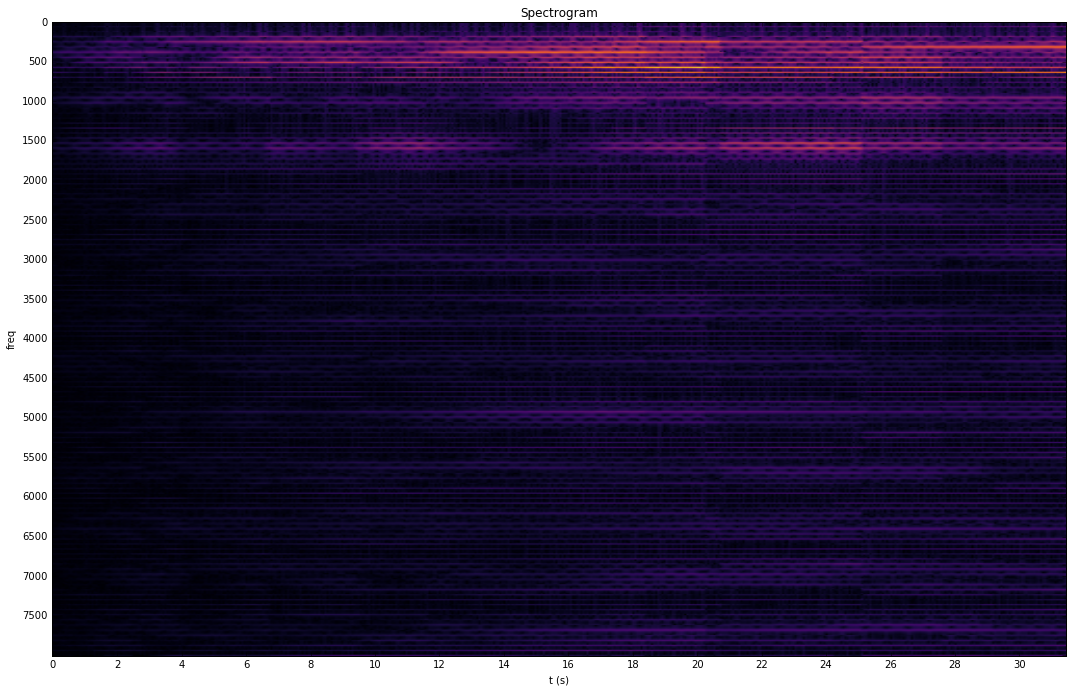

In [273]:
spectro(s_amp)

In [274]:
playseq(s)

In [275]:
min = batcher.min
max = batcher.max

In [276]:
s_p = s*(max - min) + min

In [278]:
playseq(s_p)

In [289]:
batcher = Batcher([250,16])
batch = batcher.get_batch(1)[0]

In [290]:
h = np.random.normal(size=(2,1,250))/100

(16, 1, 250)

In [292]:
for i in range(16):
    h = f2(batch[i], h)
k = f(batch[16], h)

In [301]:
ans = []
for i in range(1000):
    k = f(k, h)
    h = f2(k, h)
    ans += [k[0]]
    
s = np.concatenate(ans, axis=0)

In [303]:
length = 1024
maximum = (s.shape[0]/length)*length
s_amp, s_phase = FourierEncoder(s[0:maximum], length)

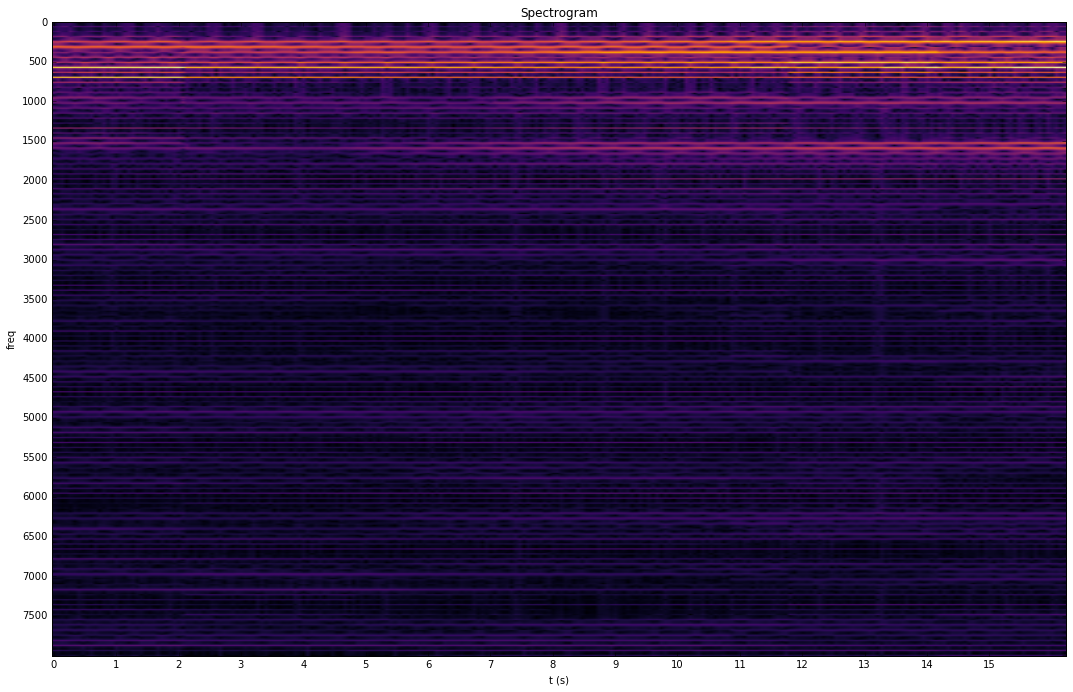

In [304]:
spectro(s_amp)

In [302]:
s.shape

(250000,)

In [305]:
playseq(s*(max-min)+min)

In [309]:
lstm.forget_gate.layers[0].linearity.weight.type()

<TensorType(float64, matrix)>